## **MLP Regressor**

MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer. 

Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

### **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler ,StandardScaler 
from sklearn.pipeline import Pipeline ,make_pipeline 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split ,GridSearchCV ,RandomizedSearchCV, cross_validate, ShuffleSplit

import warnings 
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#### **Loading the dataset**

This dataset can be fetched from sklearn with `fetch_california_housing` API.

In [3]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y=True)

In [4]:
print('Shape of feature matrix : ' ,X.shape)
print('Shape of label vector : ',y.shape)

Shape of feature matrix :  (20640, 8)
Shape of label vector :  (20640,)


#### **Split data into train & test sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 

In [6]:
print('Shape of training feature matrix : ' ,X_train.shape)
print('Shape of training label vector : ',y_train.shape)
print()
print('Shape of test feature matrix : ' ,X_test.shape)
print('Shape of test label vector : ',y_test.shape)

Shape of training feature matrix :  (16512, 8)
Shape of training label vector :  (16512,)

Shape of test feature matrix :  (4128, 8)
Shape of test label vector :  (4128,)


#### **Fit a pipeline to implement MLPRegressor**

Let's train a MLPRegressor with 3 hidden layers having 128 neurons each. 

In [7]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', MLPRegressor(hidden_layer_sizes=(32)))])

In [8]:
cv_results = cross_validate(pipe,
                            X_train,
                            y_train,
                            cv=cv,
                            scoring="neg_mean_absolute_percentage_error",
                            return_train_score=True,
                            return_estimator=True)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']


print(
    f"Mean absolute error of MLP regressor model on the train set :\n" f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}")

print()
print(
    f"Mean absolute error of MLP regressor model on the test set :\n" f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}")


Mean absolute error of MLP regressor model on the train set :
0.212 +/- 0.004

Mean absolute error of MLP regressor model on the test set :
0.213 +/- 0.007


In [9]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [10]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.2134059102590712

In [11]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.22395117090285324

#### **Plotting Predicitons**

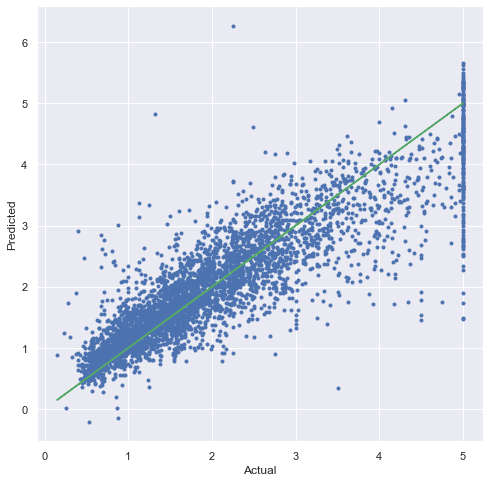

In [12]:
plt.figure(figsize=(8,8))
plt.plot(y_test, pipe.predict(X_test), 'b.')
plt.plot(y_test, y_test ,'g-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()